
# **LOAN SANCTIONABLE AMOUNT PREDICTION** <img src = "https://thumbs.dreamstime.com/b/new-infographic-personal-loan-clip-art-can-use-logo-design-creative-infragrapic-create-web-132906547.jpg" height = "60dp" >  
Machine Learning with Python Internship Project at IC SOLUTIONS


---
Team members:-
*   [ADARSH N](https://github.com/Adarsh232001)
*   [VINAYAK S BAGANNANAVAR](https://github.com/vinayak-s-b)



#Problem
The bank wants to automate the process of sanctioning the loan amount in real-time based on details provided by the loan applicant’s, as the process of calculating the loan amount is a difficult task and requires lots of dedication and hard work. Using the latest machine learning techniques we can find the best algorithm or model that predicts the loan amount to an accurate level. We are given a dataset consisting of 30,000 customer’s loan application details with all the required information and the loan sanctioned amount. We need to use the dataset provided to train the machine learning model and predict the loan amount for new customer loan details. A minimum of three machine learning models should be trained and tested using the given dataset. 



In [ ]:
#import all neccessary libraries 
import warnings
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import ensemble
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

Importing the dataset given.

In [ ]:
#Read the dataset
loan=pd.read_csv('classified-data.csv')

In [ ]:
#Drop unwanted features from the dataset
loan.drop(["Customer ID","Name"], axis=1, inplace=True)

**EDA(Exploratory Data Analysis)**

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       29947 non-null  object 
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 25424 non-null  float64
 3   Income Stability             28317 non-null  object 
 4   Profession                   30000 non-null  object 
 5   Type of Employment           22730 non-null  object 
 6   Location                     30000 non-null  object 
 7   Loan Amount Request (USD)    30000 non-null  float64
 8   Current Loan Expenses (USD)  29828 non-null  float64
 9   Expense Type 1               30000 non-null  object 
 10  Expense Type 2               30000 non-null  object 
 11  Dependents                   27507 non-null  float64
 12  Credit Score                 28297 non-null  float64
 13  No. of Defaults 

In [ ]:
loan.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [ ]:
loan.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [ ]:
loan.isnull().sum()    #finding all null values

Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

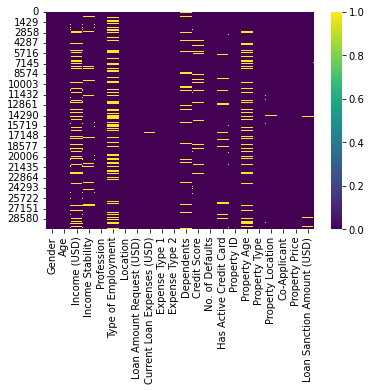

In [ ]:
#ploting a heatmap to check null values 
sns.heatmap(loan.isnull(),cmap='viridis')

(array([6338., 2517., 2482., 1980., 2461., 2526., 1998., 2428., 2825.,
        4445.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <a list of 10 Patch objects>)

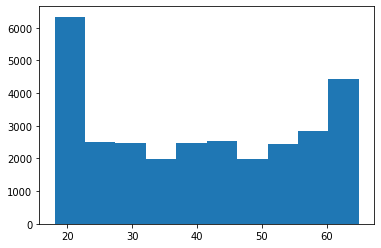

In [ ]:
plt.hist(loan['Age'])

most of people with age 20 have more number of loan

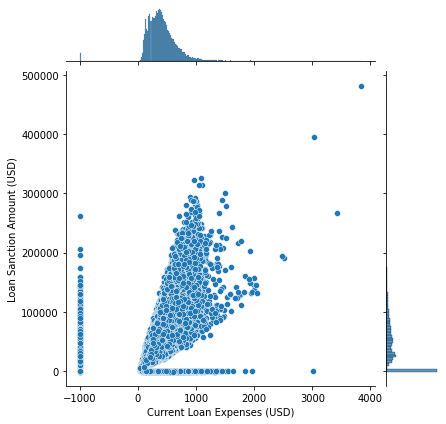

In [ ]:
sns.jointplot(x='Current Loan Expenses (USD)',y='Loan Sanction Amount (USD)',data=loan)


*  they look like they are directly proportional
*   Most of the loan expenses lie in between 0 to 2000.




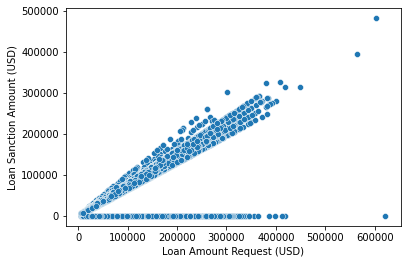

In [ ]:
sns.scatterplot(x='Loan Amount Request (USD)',y='Loan Sanction Amount (USD)',data=loan)

they look like they are directly proportional

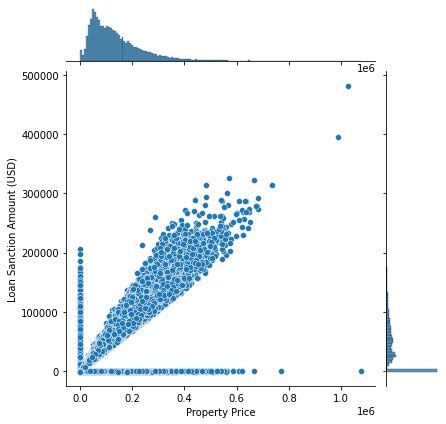

In [ ]:
sns.jointplot(x='Property Price',y='Loan Sanction Amount (USD)',data=loan)

they look like they are directly proportional

Most of the columns look like they are directly proportional, so its better to  go with linear regression 1st

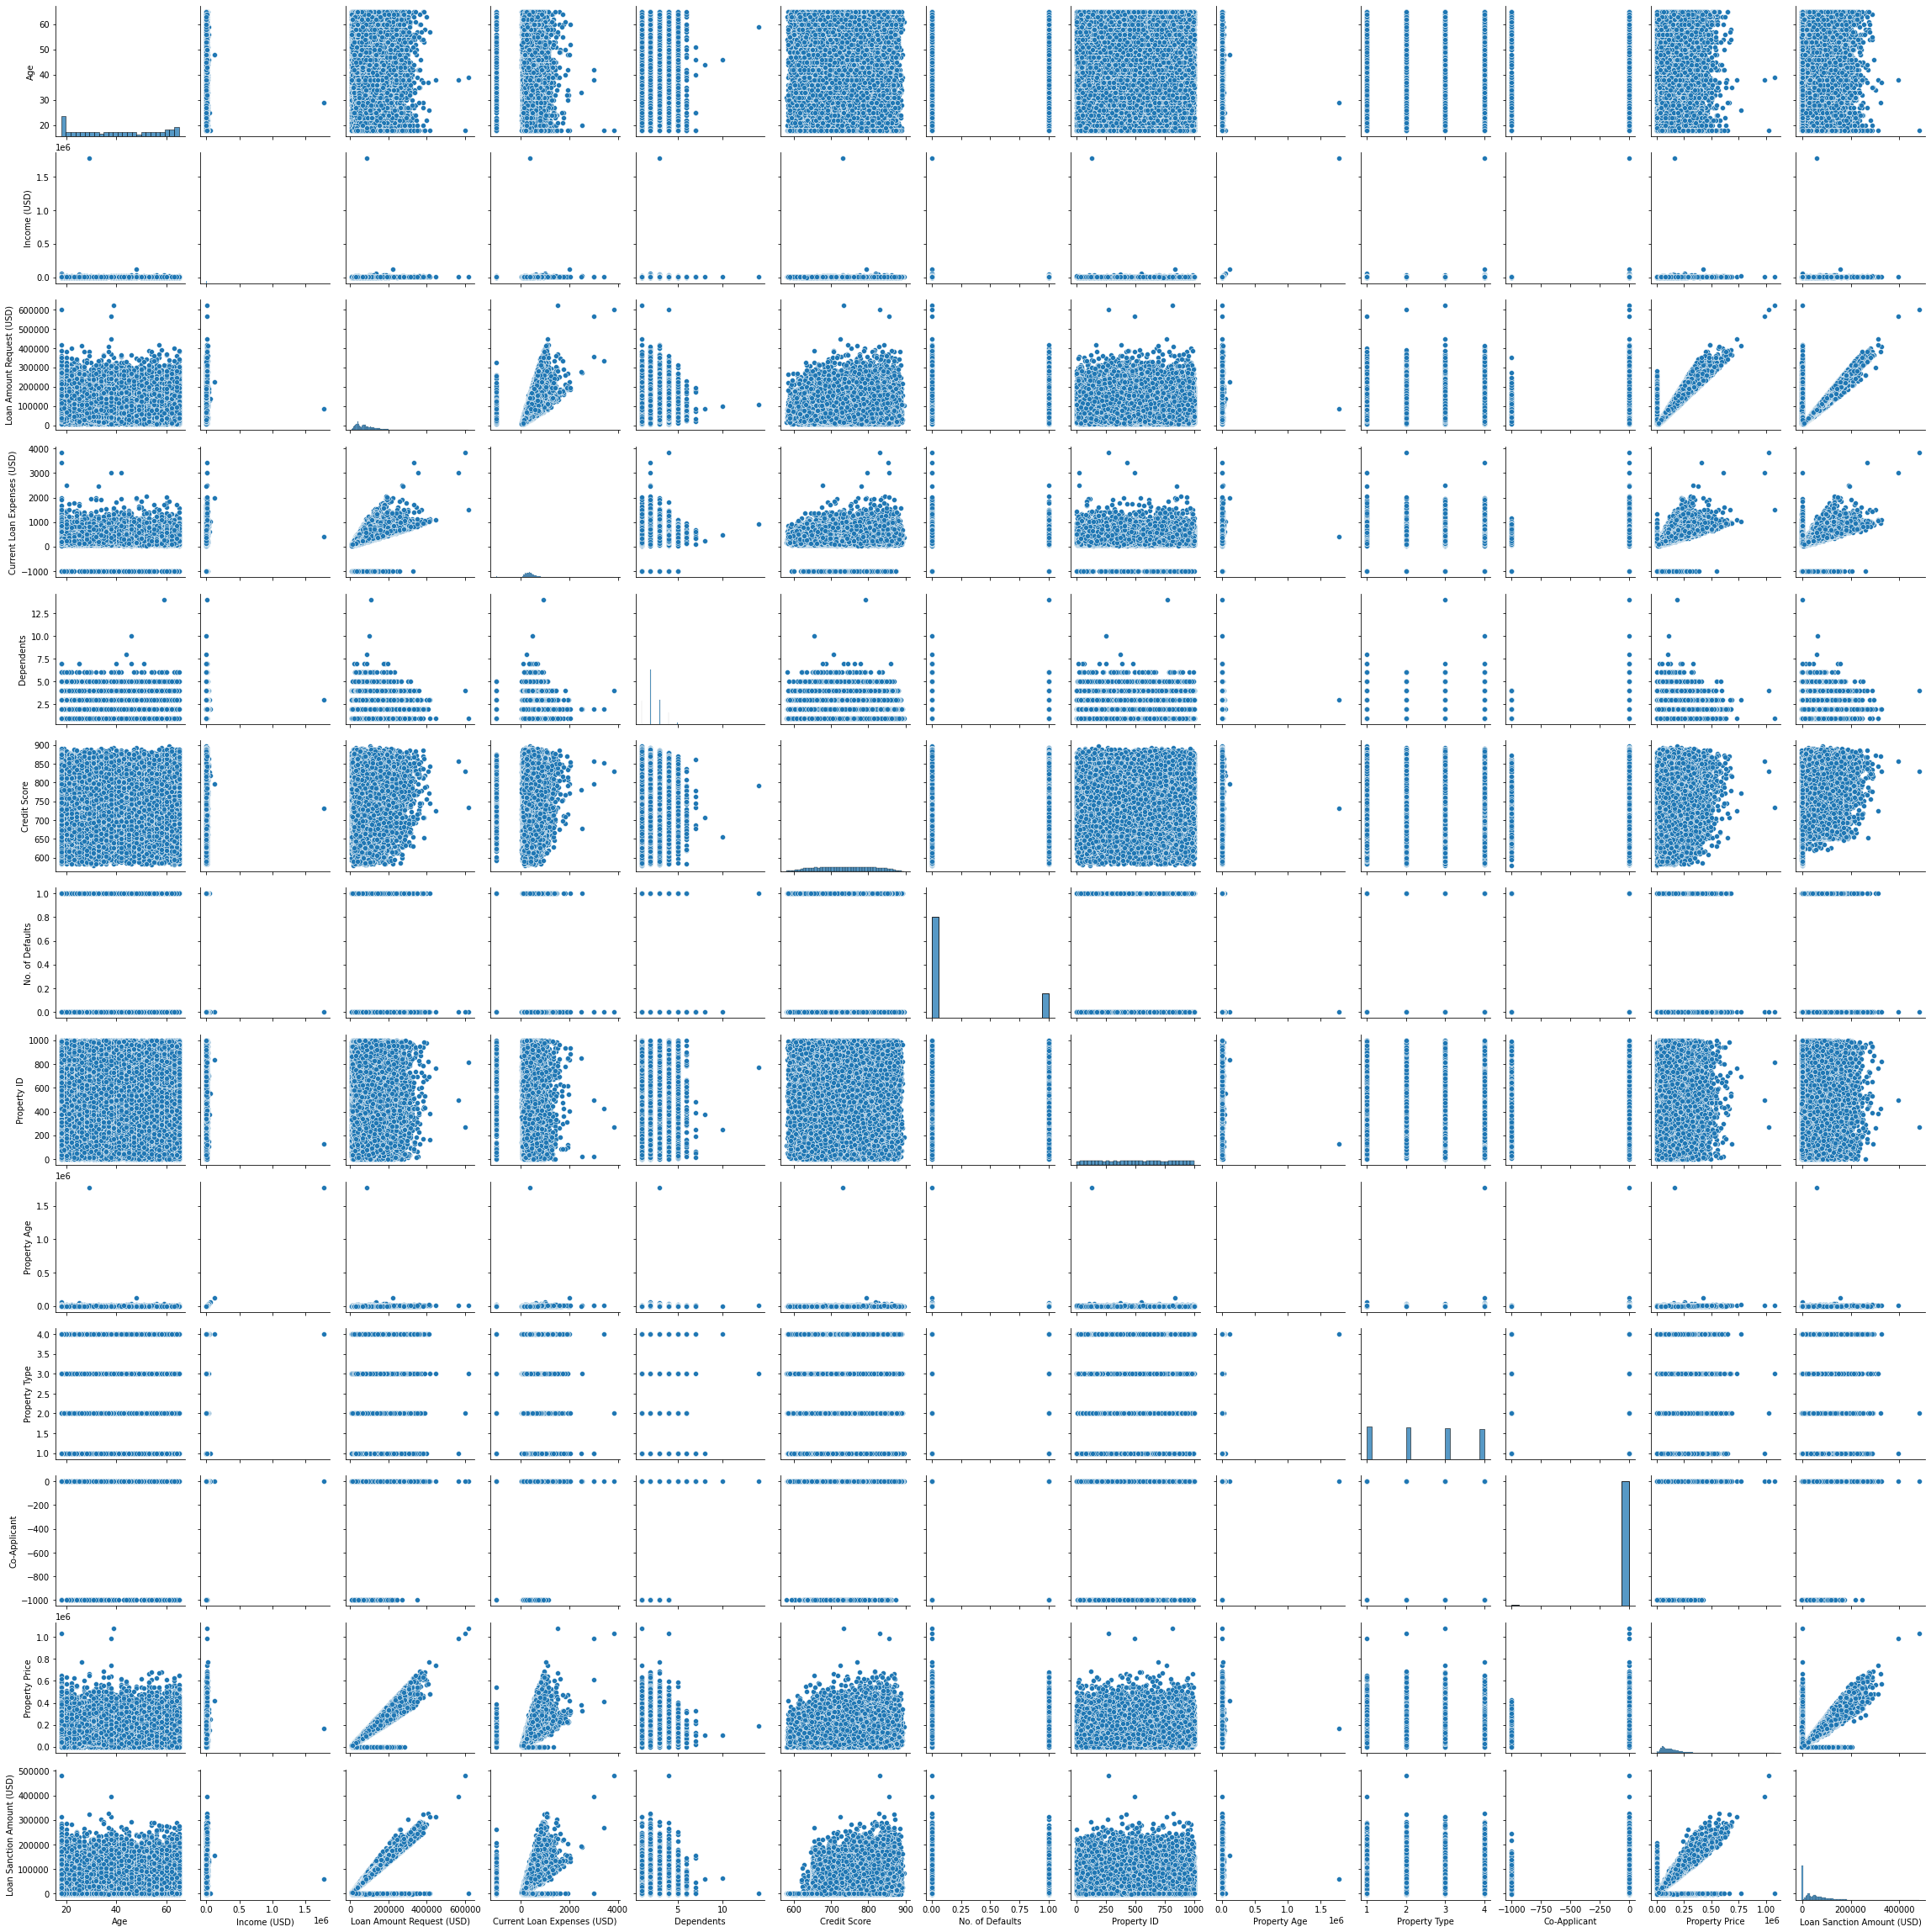

In [ ]:
sns.pairplot(loan)

In [ ]:
#Dealing with String null values
cols = loan[["Gender", "Property Location", "Income Stability", "Has Active Credit Card", "Type of Employment", "Has Active Credit Card", "Expense Type 1", "Expense Type 2"]] 
for  i in cols: 
    loan[i].fillna(loan[i].mode().iloc[0], inplace=True)

In [ ]:
#Dealing with numeric null values
n_cols = loan[["Income (USD)", "No. of Defaults", "Property ID", "Property Type", "Current Loan Expenses (USD)", "Co-Applicant", "Property Price", "Dependents", "Credit Score", "Property Age", "Loan Amount Request (USD)", "Loan Sanction Amount (USD)"]] 
for i in n_cols: 
    loan[i].fillna(loan[i].mean(axis=0), inplace=True)

In [ ]:
#convert String  to numeric values
ord_enc = OrdinalEncoder() 
loan[["Gender", 'Income Stability', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Type of Employment', 'Property Location']] = ord_enc.fit_transform(loan[["Gender", 'Income Stability', 'Profession', 'Location', 'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card', 'Type of Employment', 'Property Location']])
loan.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,0.0,56,1933.050000,1.0,7.0,14.0,1.0,72809.58,241.08,0.0,0.0,3.000000,809.44,0,0.0,746,1933.05000,4,0.0,1,119933.46,54607.18
1,1.0,32,4952.910000,1.0,7.0,8.0,1.0,46837.47,495.81,0.0,1.0,1.000000,780.40,0,2.0,608,4952.91000,2,0.0,1,54791.00,37469.98
2,0.0,65,988.190000,0.0,3.0,8.0,1.0,45593.04,171.95,0.0,1.0,1.000000,833.15,0,2.0,546,988.19000,2,2.0,0,72440.58,36474.43
3,0.0,65,2630.574417,0.0,3.0,8.0,0.0,80057.92,298.54,0.0,1.0,2.000000,832.70,1,2.0,890,2631.11944,2,1.0,1,121441.51,56040.54
4,0.0,31,2614.770000,1.0,7.0,6.0,1.0,113858.89,491.41,0.0,1.0,2.253027,745.55,1,0.0,715,2614.77000,4,1.0,1,208567.91,74008.28


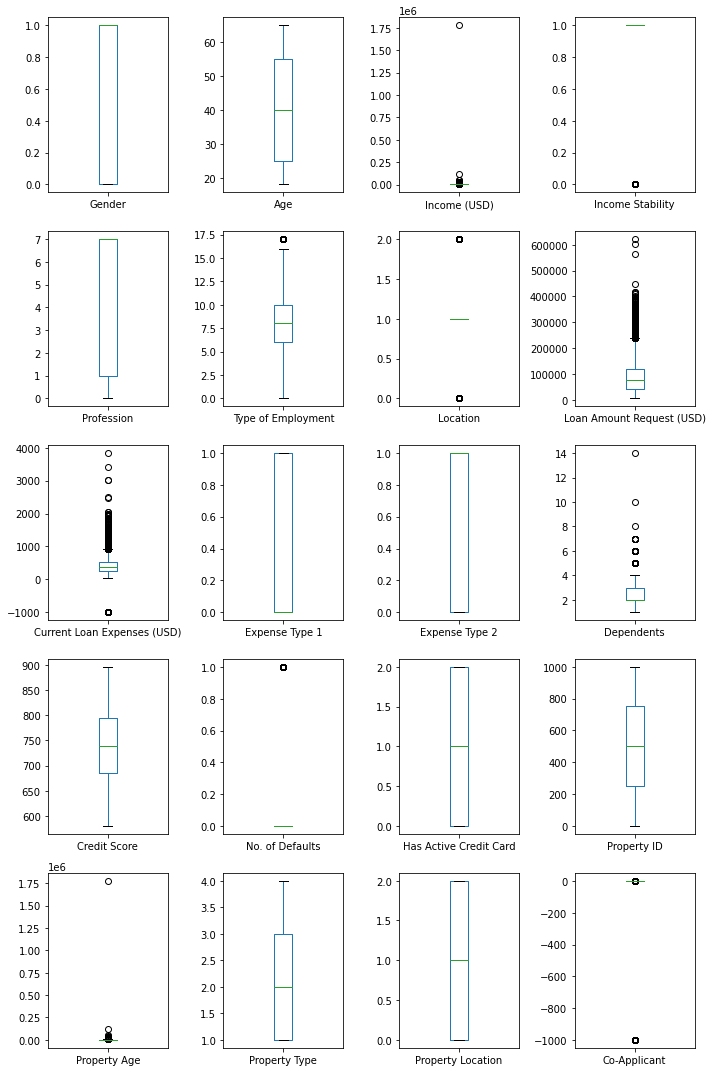

In [ ]:
plt.figure(figsize=(10,15))
try:
  for i, col in enumerate(list(loan.columns.values)):
    plt.subplot(5,4,i+1 )
    loan.boxplot(col)
    plt.grid()
    plt.tight_layout()
except ValueError:
  pass

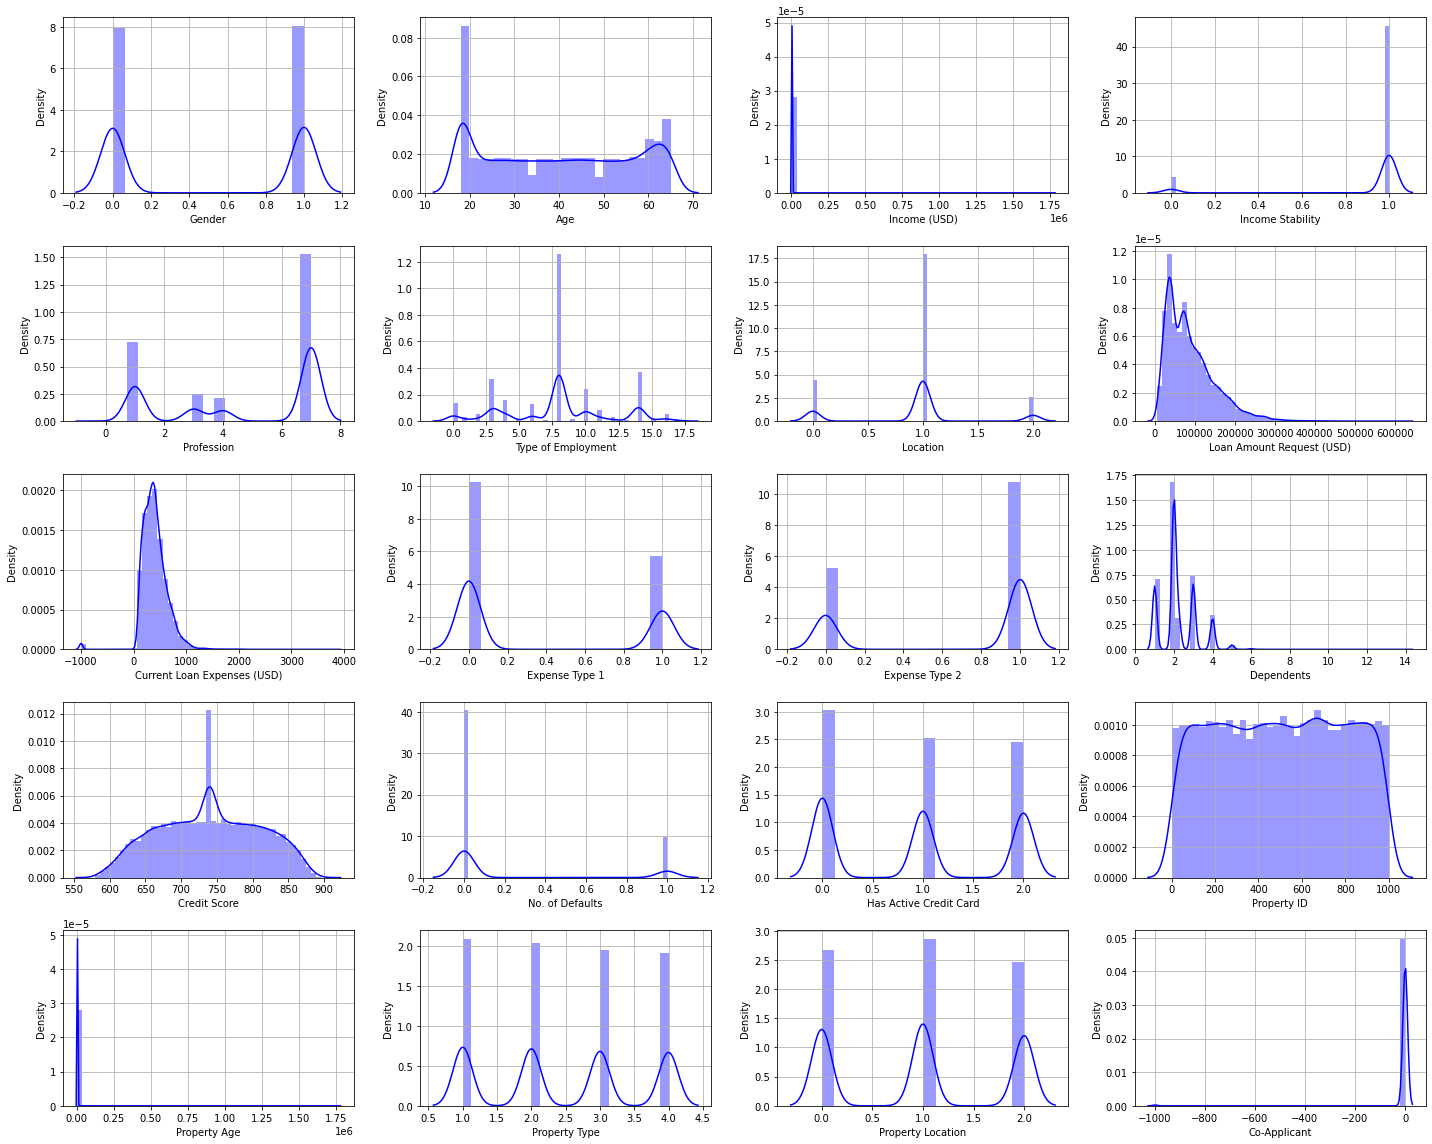

In [ ]:
plt.figure(figsize=(20,16))
try:
  for i,col in enumerate(list(loan.columns.values)):
      plt.subplot(5,4,i+1)
      sns.distplot(loan[col], color='b', kde=True, label='data')
      plt.grid()
      plt.tight_layout() 
except ValueError:
  pass

In [ ]:
#check if any null values
loan.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

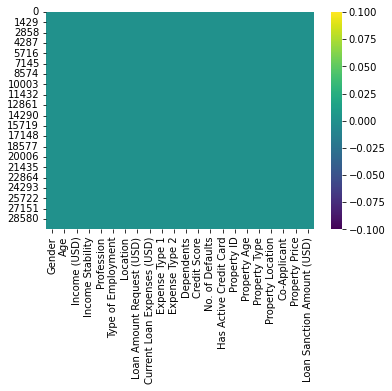

In [ ]:
sns.heatmap(loan.isnull(),cmap='viridis')

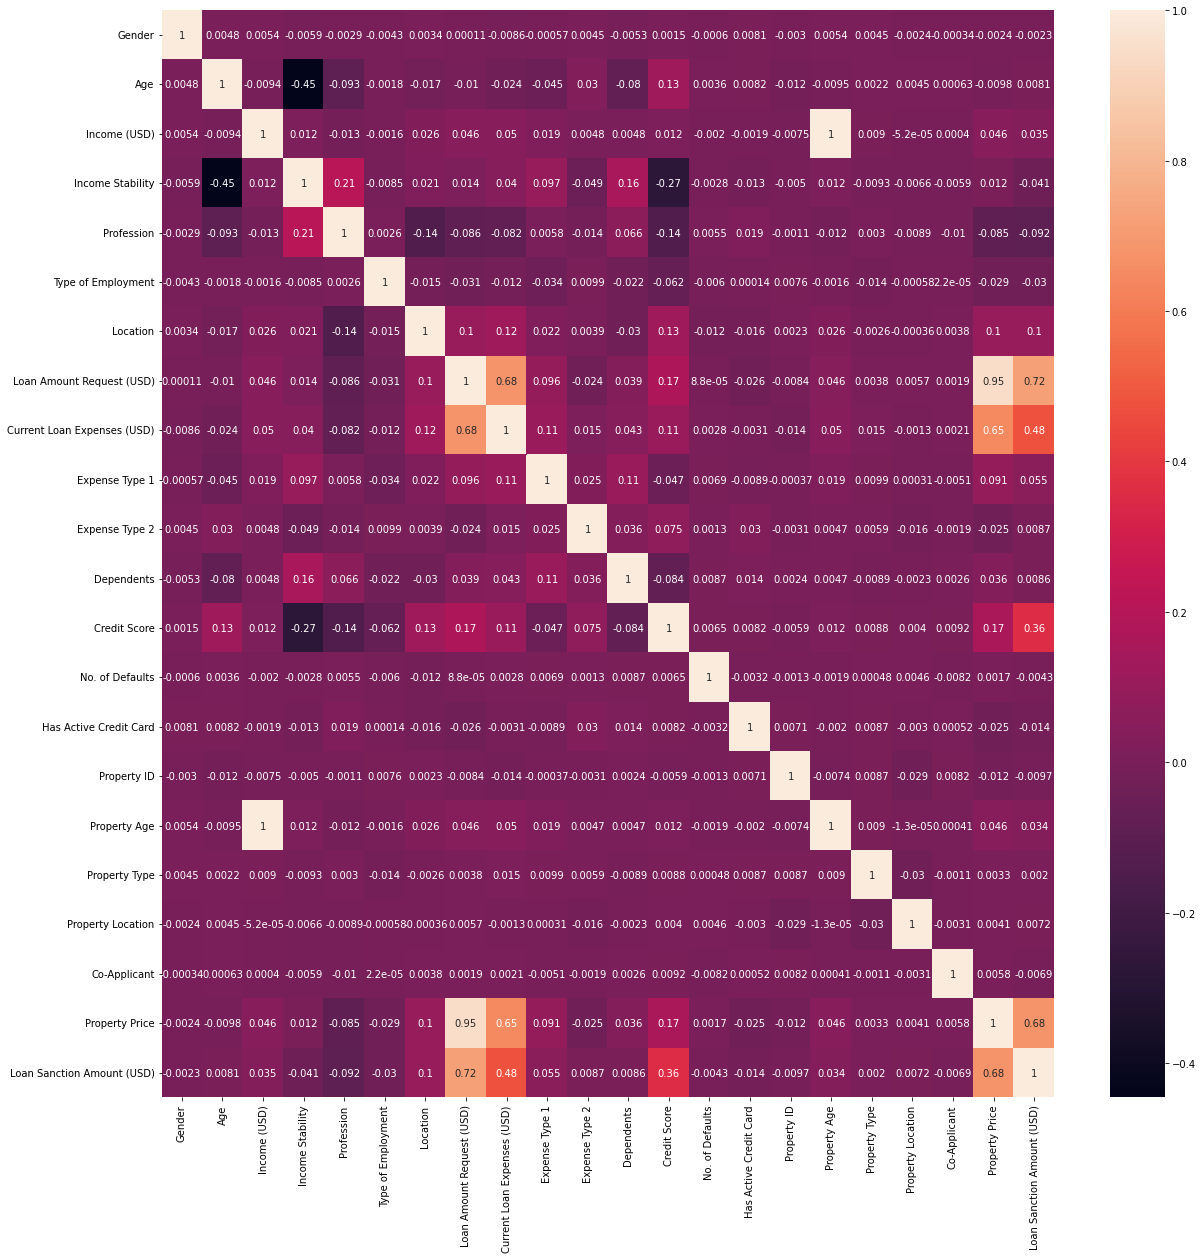

In [ ]:
#Ploat a Heatmap 
cm_1 = loan.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm_1, annot=True)
plt.show()

In [ ]:
y = loan['Loan Sanction Amount (USD)']
x = loan.drop(['Loan Sanction Amount (USD)'], axis = 1)

In [ ]:
#split the datset to Training data(70%) and Testing data(30%)
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
#standardize the data
standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

**Preparing Machine Learning Models**

In [ ]:
#Linear Regression Model
#create instence of the model
lm=LinearRegression()      
lm.fit(x_train,y_train)    #train the model on training data
linear_predict = lm.predict(x_test)     #predict the output by using testing data and store in variable  
linear_accuracy = r2_score(y_test,linear_predict) #measure the accuracy by r2 score
print(linear_accuracy)

0.5669151720750382


In [ ]:
#Decision Tree Regression Model
#cerate an instance of the model
decisionModel = DecisionTreeRegressor()
decisionModel.fit(x_train,y_train)        #train the model on training data
decisionTree_predict = decisionModel.predict(x_test)     #predict the output by using testing data and store in variable
print(r2_score(y_test,decisionTree_predict))


0.5154095910015065


In [ ]:
#Random Forest Regression Model
#create an instance of the model 
forest=RandomForestRegressor()
forest.fit(x_train,y_train)     #train the model on training data
randonForest_predict =forest.predict(x_test)        #predict the output by using testing data and store in variable
randomForest_accuracy = r2_score(y_test,randonForest_predict)
print(randomForest_accuracy)

0.7444666463455458


In [ ]:
#Bayesian Ridge Model
#create an instance of the model
Bayesian_model = linear_model.BayesianRidge()
Bayesian_model.fit(x_train, y_train)         #train the model on training data
Bayesian_predict = Bayesian_model.predict(x_test)      #predict the output by using testing data and store in variable
print(r2_score(y_test,Bayesian_predict))


0.567036498838744


In [ ]:
#Gradient Boosting Regression Model
#define params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#create an instance of the model
gradient_model = ensemble.GradientBoostingRegressor(**params)
gradient_model.fit(x_train, y_train)           #train the model on training data
gradient_predict = gradient_model.predict(x_test)          #predict the output by using testing data and store in variable
print(r2_score(y_test, gradient_predict))

0.7430416916985572


In [ ]:
#XGB Regression Model
xgb = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,                 
             colsample_bynode=1, colsample_bytree=1,importance_type='gain', learning_rate=0.1, 
             max_depth=5, min_child_weight=1, n_estimators=500, objective='reg:squarederror', 
             random_state=42, reg_lambda=1, scale_pos_weight=1,subsample=1, verbosity=1)            #create an instance of the model and pass all the neccessary parameters
xgb.fit(x_train, y_train)     #train the model on training data
xgb_predict = xgb.predict(x_test) #predict the output by using testing data and store in variable
print(r2_score(y_test, xgb_predict))

0.7428334924640755


In [ ]:
#Lasso regression model
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(x_train,y_train)            #train the model on training data
lasso_predict = lasso.predict(x_test)     #predict the output by using testing data and store in variable
print(r2_score(y_test,lasso_predict))

0.5670196549545401


In [ ]:
#Adaboosting model
adaboost_model = AdaBoostRegressor()      #create an instance of the model
adaboost_model.fit(x_train, y_train)      #train the model on training data
adaboost_predict =adaboost_model.predict(x_test)    #predict the output by using testing data and store in variable
print(r2_score(y_test, adaboost_predict))

0.49154203256541373


In [ ]:
#KNN (K Nearest Neighbours)
knn = KNeighborsRegressor()     #create an instance of the model
knn.fit(x_train, y_train)     #train the model on training data
knn_pred = knn.predict(x_test)        #predict the output by using testing data and store in variable
print(r2_score(y_test, knn_pred))

0.4609709456509229


In [ ]:
#Artificial Neural Network using Tensorflow
warnings.filterwarnings('ignore')   #ignoring the warnings  
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation='relu'))        #create the layers
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(x = x_train,              #train the model on training data by defining neccessary parameters
        y = y_train,      
        batch_size = 32, 
        epochs = 100, 
        shuffle = 1,
        validation_split = 0.05)

annpred = ann.predict(x_test)         #predict the output by using testing data and store in variable
print("Accuracy           :", r2_score(y_test,annpred))

Epoch 1/100
624/624 [==============================] - 2s 2ms/step - loss: 4604633600.0000 - val_loss: 4618604032.0000
Epoch 2/100
624/624 [==============================] - 1s 2ms/step - loss: 4589803520.0000 - val_loss: 4587808768.0000
Epoch 3/100
624/624 [==============================] - 1s 2ms/step - loss: 4538279936.0000 - val_loss: 4512139776.0000
Epoch 4/100
624/624 [==============================] - 1s 2ms/step - loss: 4439679488.0000 - val_loss: 4385776128.0000
Epoch 5/100
624/624 [==============================] - 1s 1ms/step - loss: 4291043840.0000 - val_loss: 4208542208.0000
Epoch 6/100
624/624 [==============================] - 1s 1ms/step - loss: 4095725056.0000 - val_loss: 3986579456.0000
Epoch 7/100
624/624 [==============================] - 1s 1ms/step - loss: 3857642496.0000 - val_loss: 3725092864.0000
Epoch 8/100
624/624 [==============================] - 1s 1ms/step - loss: 3583813376.0000 - val_loss: 3431599616.0000
Epoch 9/100
624/624 [===========================